## Lab 4
Define a function which accepts an array containing the initial conditions (called y in the documentation), position and velocity: (x, y, z, vx, vy, vz) of the particle and the time (array with time


In [20]:
import scipy
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt


20.0


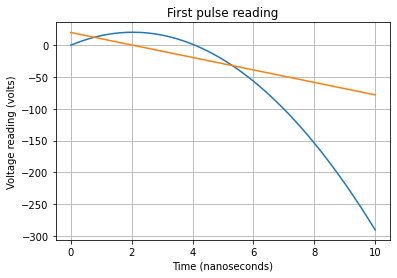

In [29]:
# Format of y : (x,y,z,vx,vy,vz)
def derivative_value(t,y) :
    g = scipy.constants.g
    dydt = (y[3],y[4],y[5],0,0,-g)
    return dydt

y0 = [0, 0, 0, 1.0, 0.0, 20.0]
print(y0[5])
times = (0, 50)
time_range = np.linspace(0,10)

solution = solve_ivp(derivative_value, times, y0, t_eval=time_range)

# Plot the data from the first row
fig, ax = plt.subplots()
ax.plot(solution.t, solution.y[2])
ax.plot(solution.t, solution.y[5])
ax.set_xlabel('Time (nanoseconds)')
ax.set_ylabel('Voltage reading (volts)')
ax.set_title('First pulse reading');
ax.grid(True)


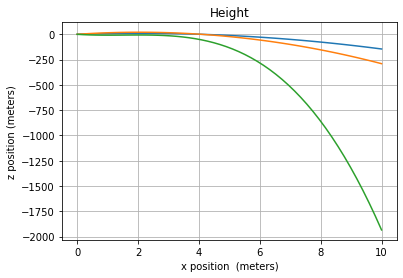

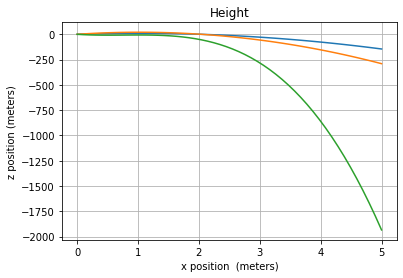

In [42]:
def drag_value(t,y) :
    g = scipy.constants.g
    drag = 0.5
    dydt = (y[3]*(1-drag),y[4]*(1-drag),y[5]*(1-drag),0,0,-g)
    return dydt

def squared_value(t,y) :
    g = scipy.constants.g
    drag = 0.1
    dydt = (y[3]-drag*y[3]**2,y[4]-drag*y[4]**2,y[5]-drag*y[5]**2,0,0,-g)
    return dydt

solution_drag = solve_ivp(drag_value, times, y0, t_eval=time_range)
solution_squared = solve_ivp(squared_value, times, y0, t_eval=time_range)
# Plot the data from the first row
fig, ax = plt.subplots()
ax.plot(solution_drag.t, solution_drag.y[2])
ax.plot(solution_drag.t, solution.y[2])
ax.plot(solution_drag.t, solution_squared.y[2])
ax.set_xlabel('x position  (meters)')
ax.set_ylabel('z position (meters)')
ax.set_title('Height');
ax.grid(True)


fig, ax = plt.subplots()
ax.plot(solution_drag.y[0], solution_drag.y[2])
ax.plot(solution_drag.y[0], solution.y[2])
ax.plot(solution_drag.y[0], solution_squared.y[2])
ax.set_xlabel('x position  (meters)')
ax.set_ylabel('z position (meters)')
ax.set_title('Height');
ax.grid(True)